In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Donors.csv', 'Donations.csv', 'Resources.csv', 'Teachers.csv', 'Projects.csv', 'Schools.csv']


In [2]:
# import our bq_helper package
import bq_helper 

In [3]:
# create a helper object for our bigquery dataset
bitcoin_blockchain = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", 
                                       dataset_name = "bitcoin_blockchain")

In [4]:
bitcoin_blockchain.list_tables()

['blocks', 'transactions']

In [5]:
bitcoin_blockchain.table_schema("blocks")

[SchemaField('block_id', 'STRING', 'NULLABLE', None, ()),
 SchemaField('previous_block', 'STRING', 'NULLABLE', None, ()),
 SchemaField('merkle_root', 'STRING', 'NULLABLE', None, ()),
 SchemaField('timestamp', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('difficultyTarget', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('nonce', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('version', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('work_terahash', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('work_error', 'STRING', 'NULLABLE', None, ()),
 SchemaField('transactions', 'RECORD', 'REPEATED', None, (SchemaField('transaction_id', 'STRING', 'NULLABLE', None, ()), SchemaField('inputs', 'RECORD', 'REPEATED', None, (SchemaField('input_script_bytes', 'BYTES', 'NULLABLE', None, ()), SchemaField('input_script_string', 'STRING', 'NULLABLE', None, ()), SchemaField('input_script_string_error', 'STRING', 'NULLABLE', None, ()), SchemaField('input_sequence_number', 'INTEGER', 'NULLABLE', None, ()), S

In [6]:
bitcoin_blockchain.table_schema("transactions")

[SchemaField('timestamp', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('transaction_id', 'STRING', 'NULLABLE', None, ()),
 SchemaField('inputs', 'RECORD', 'REPEATED', None, (SchemaField('input_script_bytes', 'BYTES', 'NULLABLE', None, ()), SchemaField('input_script_string', 'STRING', 'NULLABLE', None, ()), SchemaField('input_script_string_error', 'STRING', 'NULLABLE', None, ()), SchemaField('input_sequence_number', 'INTEGER', 'NULLABLE', None, ()), SchemaField('input_pubkey_base58', 'STRING', 'NULLABLE', None, ()), SchemaField('input_pubkey_base58_error', 'STRING', 'NULLABLE', None, ()))),
 SchemaField('outputs', 'RECORD', 'REPEATED', None, (SchemaField('output_satoshis', 'INTEGER', 'NULLABLE', None, ()), SchemaField('output_script_bytes', 'BYTES', 'NULLABLE', None, ()), SchemaField('output_script_string', 'STRING', 'NULLABLE', None, ()), SchemaField('output_script_string_error', 'STRING', 'NULLABLE', None, ()), SchemaField('output_pubkey_base58', 'STRING', 'NULLABLE', None, ()), Sch

In [7]:
bitcoin_blockchain.head('transactions')

,timestamp,transaction_id,inputs,outputs,block_id,previous_block,merkle_root,nonce,version,work_terahash,work_error
0,1507216143000,093753d2cbd0d82baf524c791a1e1428ec34d71b87a023...,[{'input_script_bytes': b'\x00G0D\x02 m\xb7\xf...,"[{'output_satoshis': 255500, 'output_script_by...",0000000000000000008603571315cf3279c1a7c2d3e1a8...,000000000000000000d315bc73f5efb472b3ec6a598462...,1369073db5ff80e212c521900ca1c43d2320965b2fefb9...,3296044245,536870912,48270297094,None
1,1498552277000,228dbd2fcafcfd851cecb7faeaaffb95a3ad3a6cd6c37a...,[{'input_script_bytes': b'\x00G0D\x02 \x02\xc1...,"[{'output_satoshis': 645700, 'output_script_by...",00000000000000000019625d57219e4e44f4920b853473...,00000000000000000003eecc7ac1883b42faa61ba1e0fc...,27f04f613163daa0553b301d61766fadd6775261224d85...,3995435474,536870914,30567628333,None
2,1508367980000,1da5267e408cf16efd878f8582edba96b24fc0d9a5ecd7...,"[{'input_script_bytes': b""G0D\x02 ~1\xbe\xd4\x...","[{'output_satoshis': 1508346, 'output_script_b...",0000000000000000000c2acd4f3068a38bf0c53d381cc5...,0000000000000000005624a2c03d36c91a6013eba93166...,3e603cdf17d37102cf0b028dc31aeef98fdcd4acacb7e8...,4033433946,536870912,51402639154,None
3,1475760264000,92b9b1403b85af333f93a4f5bcf1c6f340204e6cd037b0...,"[{'input_script_bytes': b""\x00H0E\x02!\x00\xce...","[{'output_satoshis': 117370, 'output_script_by...",000000000000000002df111d70db5a805256456a393f5a...,0000000000000000016bce0f77afc6152e7a50d464f9e7...,3d5eae65eed50475b0a2d26d664b161a67f0aa77fb3652...,528053454,536870912,10360787452,None
4,1521213071000,c168aa7ce403ff52f22a7260055026ff1002f84df7263f...,[{'input_script_bytes': b'H0E\x02!\x00\xeb\x17...,"[{'output_satoshis': 712791, 'output_script_by...",0000000000000000004f9c256f6b969d0710f04308be14...,00000000000000000036caad2934a465584a9cb53737d9...,a6dbcf52a1fe8d9a169b8ccda4cfdf2efa0882ca2a36b0...,2765010667,536870912,141332607621,None


In [8]:
bitcoin_blockchain.head('blocks')

,block_id,previous_block,merkle_root,timestamp,difficultyTarget,nonce,version,work_terahash,work_error,transactions,row_number
0,000000000000000000d9b7b88a76464715f7bb3f3e9abc...,0000000000000000002e1baaee54d9e6fa34c6dbd4115b...,d7ac26979002db02ef46a1744cffe1e9e81e619cd53029...,1505375304000,402731275,3607913810,536870912,39631328811,None,[{'transaction_id': 'a2a05551f52d96fd14fa0e054...,1
1,00000000000005bacaa1fc572bbff8aed811023f28266c...,000000000000020c540da291aaebb12ed8bd685077932b...,e04d6a5d3ecdda7db9076a57613adf963bfc9ff95aae21...,1345752861000,436709470,2150852228,1,94098,None,[{'transaction_id': '81e913cf60e142e4ba6d0f616...,1
2,0000000000000605313e623e9b167a834580b10ab7e689...,0000000000000540d50ee25e71339e048a0c0bddcb4c81...,d2c97b5156ab43341c002f8c3256b2fae6d806895d5294...,1308606527000,437461381,1925098606,1,37665,None,[{'transaction_id': '5d40fb39cf4795c94abac5164...,1
3,0000000000000002281849faf4b3afebb41eb24a201201...,0000000000000003e8f3d7c504dfcb7e7a4d50097c6e76...,a2367c3798ccc83b90687f04437e9ab4ad16215285e3ad...,1385191053000,419892219,2491459222,2,26177481,None,[{'transaction_id': '9d62b14a6e72a264b7f8e80d2...,1
4,00000000000000000494f9f05c2881a26256e9c11380db...,00000000000000000652675d5e609e51efbd92535fe110...,b83e7b12eabdd280c7ede7442f2fe004e3cfe827c24ca5...,1456505191000,403093919,398416605,4,7022020257,None,[{'transaction_id': '3674303868c48b27bbef156ee...,1


In [9]:
bitcoin_blockchain.head("blocks", selected_columns="timestamp", num_rows=20)

,timestamp
0,1505375304000
1,1345752861000
2,1308606527000
3,1385191053000
4,1456505191000
5,1398591385000
6,1329992845000
7,1289608650000
8,1339664095000
9,1418173750000


In [10]:
query = """SELECT timestamp
            FROM `bigquery-public-data.bitcoin_blockchain.blocks`
            WHERE row_number=1 """

# check how big this query will be
bitcoin_blockchain.estimate_query_size(query)

0.007798254489898682

In [11]:
timestamp_row = bitcoin_blockchain.query_to_pandas_safe(query)

In [12]:
timestamp_row

,timestamp
0,1393549312000
1,1304764416000
2,1283792896000
3,1407172608000
4,1280991232000
5,1289027584000
6,1485455360000
7,1358921728000
8,1520050176000
9,1337245696000


In [13]:
query = """
#standardSQL
SELECT
  o.day,
  COUNT(DISTINCT(o.output_key)) AS recipients
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          86400000))) AS day,
    output.output_pubkey_base58 AS output_key
  FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`,
    UNNEST(outputs) AS output ) AS o
GROUP BY
  day
ORDER BY
  day
"""


In [14]:
no_of_recipient = bitcoin_blockchain.query_to_pandas_safe(query,max_gb_scanned=31)

In [15]:
no_of_recipient


,day,recipients
0,2009-01-09 00:00:00+00:00,0
1,2009-01-10 00:00:00+00:00,0
2,2009-01-11 00:00:00+00:00,0
3,2009-01-12 00:00:00+00:00,0
4,2009-01-13 00:00:00+00:00,0
5,2009-01-14 00:00:00+00:00,0
6,2009-01-15 00:00:00+00:00,0
7,2009-01-16 00:00:00+00:00,1
8,2009-01-17 00:00:00+00:00,0
9,2009-01-18 00:00:00+00:00,0


In [16]:
no_of_people=pd.DataFrame(data=no_of_recipient)
no_of_people.head()

,day,recipients
0,2009-01-09 00:00:00+00:00,0
1,2009-01-10 00:00:00+00:00,0
2,2009-01-11 00:00:00+00:00,0
3,2009-01-12 00:00:00+00:00,0
4,2009-01-13 00:00:00+00:00,0


Text(0,0.5,'No of recipient')

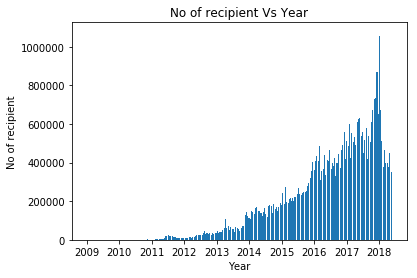

In [17]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
#plt.figure(figsize=(20,20))
plt.bar(no_of_recipient['day'],no_of_recipient['recipients']);
plt.title('No of recipient Vs Year')
plt.xlabel("Year")
plt.ylabel("No of recipient")

In [18]:
from highcharts 

SyntaxError: invalid syntax (<ipython-input-18-9e61cae1940b>, line 1)

In [19]:
query_yearly_transaction_2018 = """ WITH time AS 
            (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    transaction_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
            SELECT COUNT(transaction_id) AS transactions,
                EXTRACT(YEAR FROM trans_time) AS year
            FROM time
            WHERE EXTRACT(YEAR FROM trans_time) IN (2018,2017,2016,2015)
            GROUP BY year
            ORDER BY year
        """

In [20]:
year_2018 = bitcoin_blockchain.query_to_pandas_safe(query_yearly_transaction_2018 ,max_gb_scanned=22)

In [21]:
year_2018.head()


,transactions,year
0,45674023,2015
1,82626623,2016
2,104063229,2017
3,29290059,2018


Text(0.5,1,'Each day Transacions In 2015,2016,2017,2018')

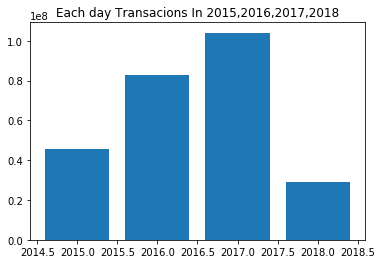

In [22]:
plt.bar(year_2018['year'],year_2018['transactions'])
plt.title('Each day Transacions In 2015,2016,2017,2018')

In [23]:
query_merkleroot_transaction = """ WITH merkleroot AS 
            (
                SELECT transaction_id,
                    merkle_root
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
            SELECT COUNT(transaction_id) AS transactions,
                merkle_root
            FROM merkleroot
            GROUP BY merkle_root
            ORDER BY COUNT(transaction_id) desc
        """

In [24]:
# transaction associated with merkle root
markle = bitcoin_blockchain.query_to_pandas_safe(query_merkleroot_transaction,max_gb_scanned=39)
#plt.bar(markle['merkle_root'],markle['transactions'])
#plt.title('Transacions In Merkle_root')

In [25]:
markle.head()

,transactions,merkle_root
0,12239,dc1bde29f6912ba825138118676988a0e7f839054155db...
1,9647,03ef22104e4561d1c8198015157aa80ec08f1aaef676bf...
2,6451,52461d6e9d181204112ee8ca440921d5df88763ddb6e86...
3,6144,60f1b83982cd4588a8a99b66bb24c5e6d7bb15d34c6a90...
4,6084,73733e699f12f312843b99b309d65ac499c57507d2120f...


In [26]:
query = """ WITH time AS 
            (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    transaction_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
            SELECT COUNT(transaction_id) AS transactions,
                EXTRACT(MONTH FROM trans_time) AS month,
                EXTRACT(YEAR FROM trans_time) AS year
            FROM time
            GROUP BY year, month 
            ORDER BY year, month
        """

In [27]:
transaction_per_Month=bitcoin_blockchain.query_to_pandas_safe(query,max_gb_scanned=22)
transaction_per_Month

,transactions,month,year
0,2575,1,2009
1,3417,2,2009
2,3487,3,2009
3,3459,4,2009
4,3401,5,2009
5,2244,6,2009
6,1930,7,2009
7,1570,8,2009
8,2170,9,2009
9,2139,10,2009


In [28]:
year_unique = pd.unique(transaction_per_Month.year)
count_max_list=[]
top_year_list=[]
top_month_list=[]
for year_row in year_unique:
    count_max=0
    for index, row in transaction_per_Month.iterrows():
        if row['transactions'] > count_max and year_row==row['year']:
            count_max= row['transactions']
            top_year= row['year']
            top_month =row['month']
    count_max_list.append(count_max)
    top_year_list.append(top_year)
    top_month_list.append(top_month)
    
max_transaction_in_year=pd.DataFrame(data=count_max_list,columns=['max_transaction'])
max_transaction_in_year['month']=top_month_list
max_transaction_in_year['year']=top_year_list
max_transaction_in_year
d={1:'JAN',2:"FEB",3:'MAR',4:"APR",5:'MAY',6:"JUN",7:'JUL',8:"AUG",9:'SEP',10:"OCT",11:'NOV',12:"DEC"}
d[max_transaction_in_year.month.iloc[0]]
    

'DEC'

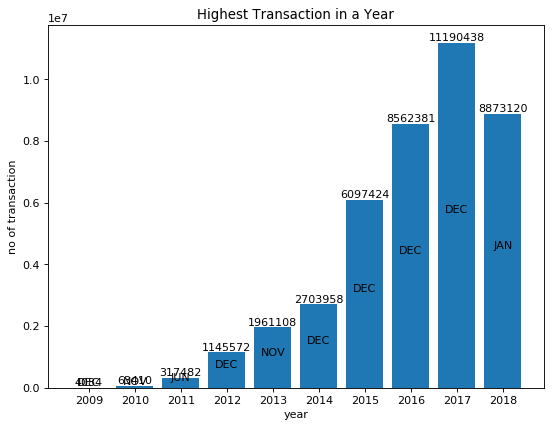

In [29]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
bar1=plt.bar(max_transaction_in_year.year,max_transaction_in_year.max_transaction)
plt.title('Highest Transaction in a Year')
plt.xlabel('year')
plt.ylabel('no of transaction')
plt.xticks(max_transaction_in_year.year)
index=0
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width()/2.0, height/2, '%s' % str(d[max_transaction_in_year.month.iloc[index]]), ha='center', va='bottom')
    index=index+1
#plt.text(max_transaction_in_year.year,max_transaction_in_year.max_transaction,s=["jan","feb"])
#text(x, y, s, fontsize=12)

In [30]:
# Mostly highest transaction has been done at the month of Nov and Dec.

Text(0,0.5,'Transation in Millions')

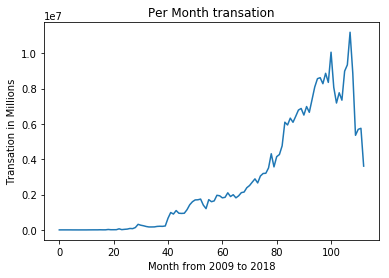

In [31]:

plt.plot(transaction_per_Month.transactions)
plt.title("Per Month transation")
plt.xlabel("Month from 2009 to 2018")
plt.ylabel("Transation in Millions")


In [32]:
query = """
        WITH time AS
            (
            SELECT TIMESTAMP_MILLIS(timestamp) as trans_time, transaction_id
            FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
        SELECT 
            EXTRACT(YEAR FROM trans_time) as year,
            EXTRACT(MONTH FROM trans_time) as month,
            EXTRACT(DAY FROM trans_time) as day,
            count(transaction_id) as transactions
        FROM time
        GROUP BY Year, Month, Day
        HAVING Year = 2018
        ORDER BY Year, Month, Day"""

In [33]:
trans_per_day_2018=bitcoin_blockchain.query_to_pandas_safe(query ,max_gb_scanned=22)

In [34]:
trans_per_day_2018.head()

,year,month,day,transactions
0,2018,1,1,241757
1,2018,1,2,340980
2,2018,1,3,395963
3,2018,1,4,425008
4,2018,1,5,342707


In [35]:
trans_per_day_2018


,year,month,day,transactions
0,2018,1,1,241757
1,2018,1,2,340980
2,2018,1,3,395963
3,2018,1,4,425008
4,2018,1,5,342707
5,2018,1,6,358847
6,2018,1,7,368187
7,2018,1,8,345672
8,2018,1,9,360265
9,2018,1,10,347393


Text(0.5,0,'Day from Jan to till ')

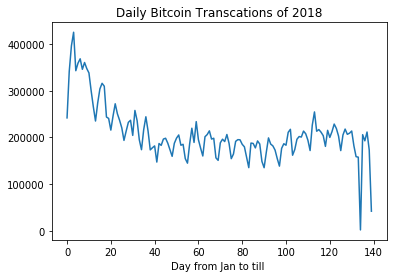

In [36]:
plt.plot(trans_per_day_2018.transactions)
plt.title("Daily Bitcoin Transcations of 2018")
plt.xlabel("Day from Jan to till ")

In [37]:
query_2017 = """
        WITH time AS
            (
            SELECT TIMESTAMP_MILLIS(timestamp) as trans_time, transaction_id
            FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
        SELECT 
            EXTRACT(YEAR FROM trans_time) as year,
            EXTRACT(MONTH FROM trans_time) as month,
            EXTRACT(DAY FROM trans_time) as day,
            count(transaction_id) as transactions
        FROM time
        GROUP BY Year, Month, Day
        HAVING Year = 2017
        ORDER BY Year, Month, Day"""

In [38]:
trans_per_day_2017=bitcoin_blockchain.query_to_pandas_safe(query_2017,max_gb_scanned=22)

Text(0.5,0,'Day from Jan to Dec 31 ')

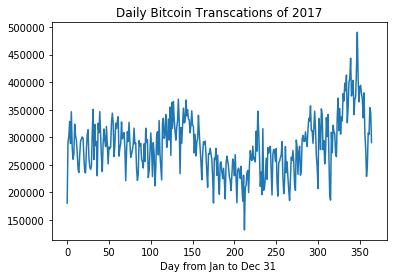

In [39]:
plt.plot(trans_per_day_2017.transactions)
plt.title("Daily Bitcoin Transcations of 2017")
plt.xlabel("Day from Jan to Dec 31 ")

In [40]:
compare=pd.DataFrame()

In [41]:
compare['transaction_2017']=trans_per_day_2017.transactions
compare['transaction_2018']=trans_per_day_2018.transactions
compare=compare.dropna(axis=0, how='any')

In [42]:
compare

,transaction_2017,transaction_2018
0,180502,241757.0
1,290951,340980.0
2,301664,395963.0
3,328642,425008.0
4,288501,342707.0
5,346405,358847.0
6,282060,368187.0
7,260101,345672.0
8,269947,360265.0
9,323888,347393.0


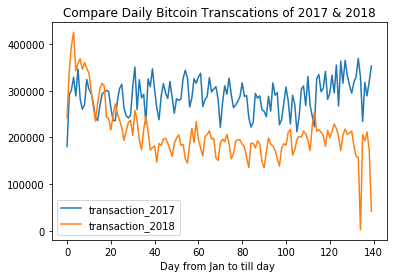

In [43]:
#Comparing the per day tansaction between 2017 and 2018 
plt.plot(compare.transaction_2017)
plt.plot(compare.transaction_2018)
plt.title("Compare Daily Bitcoin Transcations of 2017 & 2018")
plt.xlabel("Day from Jan to till day ")
plt.legend()

In [44]:
#comapre to  this year(2018) to previous year(2017), daily transaction has been decreasing